<div class="alert alert-block alert-info">
__15/15__ Ananya Sriram

# Donovan Feist

# CH EN 3603

# Homework 10

# Problem 1

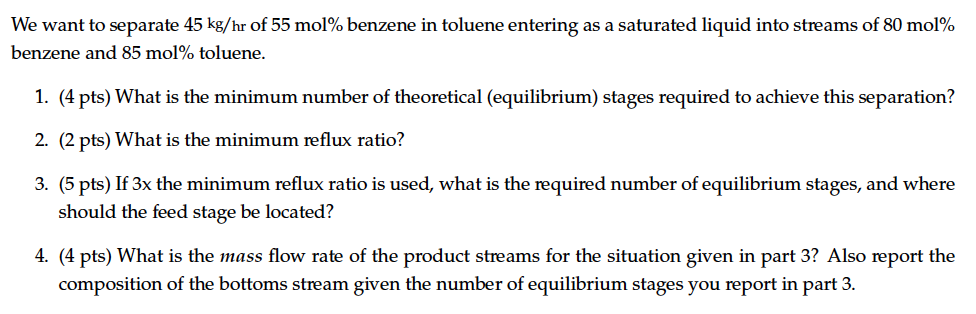

## part 1 solution

The minimum number of theoretical stages is determined by finding the number of stages when the rectifying line and stripping line both have slopes of 1, leading to the operating line being $y=x$.

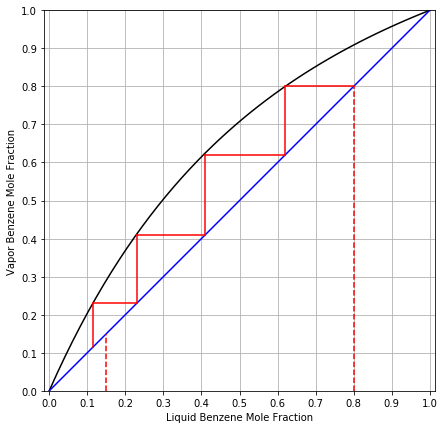

In [3]:
x_D=0.80 #mole fraction of benzene in distillate
x_B=1-0.85 #mole fraction of benzene in bottoms

import numpy as np

#defining vertical lines
uD=np.linspace(0,x_D)
pD=x_D*np.ones(len(uD))
uB=np.linspace(0,x_B)
pB=x_B*np.ones(len(uB))

#defining step lines
#step 1
g1=0.6202
h1=np.linspace(g1,x_D)
a1_1=x_D*np.ones(len(h1))
v1=np.linspace(g1,x_D)
a1_2=g1*np.ones(len(v1))
#step 2
g2=0.41
h2=np.linspace(g2,g1)
a2_1=g1*np.ones(len(h2))
v2=np.linspace(g2,g1)
a2_2=g2*np.ones(len(v2))
#step 3
g3=0.23
h3=np.linspace(g3,g2)
a3_1=g2*np.ones(len(h3))
v3=np.linspace(g3,g2)
a3_2=g3*np.ones(len(v3))
#step 4
g4=0.115
h4=np.linspace(g4,g3)
a4_1=g3*np.ones(len(h4))
v4=np.linspace(g4,g3)
a4_2=g4*np.ones(len(v4))

import pandas as pd
data=pd.read_csv('Txy.csv')
Teq=data['T'].values
xeq=data['x'].values
yeq=data['y'].values

#plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.plot(xeq,yeq,'k-',[0,1],[0,1],'b-')
#plotting vertical lines
plt.plot(pD,uD,'r--')
plt.plot(pB,uB,'r--')
#plotting first step
plt.plot(h1,a1_1,'r-')
plt.plot(a1_2,v1,'r-')
#plotting second step
plt.plot(h2,a2_1,'r-')
plt.plot(a2_2,v2,'r-')
#plotting third step
plt.plot(h3,a3_1,'r-')
plt.plot(a3_2,v3,'r-')
#plotting fourth step
plt.plot(h4,a4_1,'r-')
plt.plot(a4_2,v4,'r-')
#finish plotting
plt.grid()
plt.axis('equal')
plt.axis([0,1,0,1])
plt.xlabel('Liquid Benzene Mole Fraction')
plt.ylabel('Vapor Benzene Mole Fraction')
axes=plt.gca()
axes.set_xticks(np.arange(0,1.01,0.1))
axes.set_yticks(np.arange(0,1.01,0.1))

The minimum number of theoretical stages is $\boxed{4 \space stages}$.

## part 2 solution

$R_{min}=\frac{(L/V)_{min}}{1-(L/V)_{min}}$

where $(L/V)_{min}$ is the slope of the rectifying line. This is determined by pushing the q-line all the way to the equilibrium curve, then connecting that intersection point to the point on the y=x line that corresponds to to $x_D$. In this situation, the feed is a saturated liquid, so q=1, which corresponds to an infinite slope, or a vertical line.

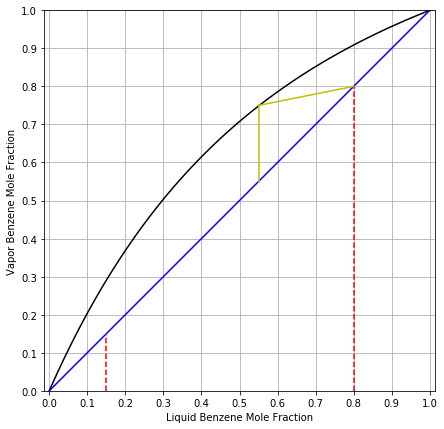

In [4]:
#q-line data points
z=0.55 #mole fraction of benzene
zeq=0.75 #value on equilibrium curve that is directly above z on the y=x line
qy=np.linspace(z,zeq)
qx=z*np.ones(len(qy))

#plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.plot(xeq,yeq,'k-',[0,1],[0,1],'b-')
#plotting vertical lines
plt.plot(pD,uD,'r--')
plt.plot(pB,uB,'r--')
#plotting q-line
plt.plot(qx,qy,'y-')
#plotting rectifying line
plt.plot([z,x_D],[zeq,x_D],'y-')
#finish plotting
plt.grid()
plt.axis('equal')
plt.axis([0,1,0,1])
plt.xlabel('Liquid Benzene Mole Fraction')
plt.ylabel('Vapor Benzene Mole Fraction')
axes=plt.gca()
axes.set_xticks(np.arange(0,1.01,0.1))
axes.set_yticks(np.arange(0,1.01,0.1))

In [5]:
#calculating slope of rectifying line
slope=(x_D-zeq)/(x_D-z)
print('(L/V)_min=',slope)

(L/V)_min= 0.20000000000000018


Now that $(L/V)_{min}$ is known, $R_{min}$ can be found using the equation

$R_{min}=\frac{(L/V)_{min}}{1-(L/V)_{min}}$

In [6]:
Rmin=slope/(1-slope)
print('R_min=',Rmin)

R_min= 0.2500000000000003


The minimum reflux ratio is $\boxed{R_{min}=0.250}$

## part 3 solution

If 3 times the minimum reflux ratio is used then $R=3R_{min}$.

In [7]:
R=3*Rmin
print('R=',R)

R= 0.7500000000000009


This can be converted into the slope of the rectifying line with the equation

$(L/V)=\frac{R}{R+1}$

In [8]:
LoV=R/(R+1)
print('(L/V)=',LoV)

(L/V)= 0.4285714285714289


Using this value for the slope of the rectifying line, the q-line, rectifying line, and stripping line can now be plotted. Once these lines are plottes, the step lines are plotted in an iterative manner until the value for $x_B$ is reached or surpassed.

x_B= 0.12035354543658125


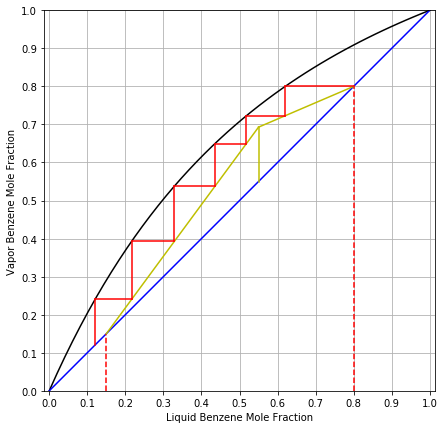

In [9]:
#rectifying line data points
x=np.linspace(z,x_D)
y1=x_D-LoV*(x_D-z)
y=LoV*x-LoV*z+y1

#q-line data points
z=0.55 #mole fraction of benzene
zend=y[0] #value on equilibrium curve that is directly above z on the y=x line
qy=np.linspace(z,zend)
qx=z*np.ones(len(qy))

#stripping line data points
xs=[x_B,z]
ys=[x_B,zend]

#defining step lines
#step 1
g1=np.interp(x_D,yeq,xeq) #left x of horizontal line (knowing y, use y data, to get x value from x data)
h1=np.linspace(g1,x_D) #x values of horizontal line
a1_1=x_D*np.ones(len(h1)) #y values of horizontal line
y1v1=np.interp(g1,x,y) #lower y value of vertical line (knowing x, use x data, to get y value from y data)
v1=np.linspace(y1v1,x_D) #y values of vertical line
a1_2=g1*np.ones(len(v1)) #x values of vertical line
#step 2
g2=np.interp(y1v1,yeq,xeq) #left x of horizontal line (knowing y, use y data, to get x value from x data)
h2=np.linspace(g2,g1) #x values of horizontal line
a2_1=y1v1*np.ones(len(h2)) #y values of horizontal line
y1v2=np.interp(g2,xs,ys) #lower y value of vertical line (knowing x, use x data, to get y value from y data)
v2=np.linspace(y1v2,y1v1) #y values of vertical line
a2_2=g2*np.ones(len(v2)) #x values of vertical line
#step 3
g3=np.interp(y1v2,yeq,xeq) #left x of horizontal line (knowing y, use y data, to get x value from x data)
h3=np.linspace(g3,g2) #x values of horizontal line
a3_1=y1v2*np.ones(len(h3)) #y values of horizontal line
y1v3=np.interp(g3,xs,ys) #lower y value of vertical line (knowing x, use x data, to get y value from y data)
v3=np.linspace(y1v3,y1v2) #y values of vertical line
a3_2=g3*np.ones(len(v3)) #x values of vertical line
#step 4
g4=np.interp(y1v3,yeq,xeq) #left x of horizontal line (knowing y, use y data, to get x value from x data)
h4=np.linspace(g4,g3) #x values of horizontal line
a4_1=y1v3*np.ones(len(h4)) #y values of horizontal line
y1v4=np.interp(g4,xs,ys) #lower y value of vertical line (knowing x, use x data, to get y value from y data)
v4=np.linspace(y1v4,y1v3) #y values of vertical line
a4_2=g4*np.ones(len(v4)) #x values of vertical line
#step 5
g5=np.interp(y1v4,yeq,xeq) #left x of horizontal line (knowing y, use y data, to get x value from x data)
h5=np.linspace(g5,g4) #x values of horizontal line
a5_1=y1v4*np.ones(len(h5)) #y values of horizontal line
y1v5=np.interp(g5,xs,ys) #lower y value of vertical line (knowing x, use x data, to get y value from y data)
v5=np.linspace(y1v5,y1v4) #y values of vertical line
a5_2=g5*np.ones(len(v5)) #x values of vertical line
#step 6
g6=np.interp(y1v5,yeq,xeq) #left x of horizontal line (knowing y, use y data, to get x value from x data)
h6=np.linspace(g6,g5) #x values of horizontal line
a6_1=y1v5*np.ones(len(h6)) #y values of horizontal line
y1v6=g6
v6=np.linspace(y1v6,y1v5) #y values of vertical line
a6_2=g6*np.ones(len(v6)) #x values of vertical line

#plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.plot(xeq,yeq,'k-',[0,1],[0,1],'b-')
#plotting vertical lines
plt.plot(pD,uD,'r--')
plt.plot(pB,uB,'r--')
#plotting q-line
plt.plot(qx,qy,'y-')
#plotting rectifying line
plt.plot(x,y,'y-')
#plotting stripping line
plt.plot(xs,ys,'y-')
#plotting first step
plt.plot(h1,a1_1,'r-')
plt.plot(a1_2,v1,'r-')
#plotting second step
plt.plot(h2,a2_1,'r-')
plt.plot(a2_2,v2,'r-')
#plotting third step
plt.plot(h3,a3_1,'r-')
plt.plot(a3_2,v3,'r-')
#plotting fourth step
plt.plot(h4,a4_1,'r-')
plt.plot(a4_2,v4,'r-')
#plotting fifth step
plt.plot(h5,a5_1,'r-')
plt.plot(a5_2,v5,'r-')
#plotting sixth step
plt.plot(h6,a6_1,'r-')
plt.plot(a6_2,v6,'r-')
#finish plotting
plt.grid()
plt.axis('equal')
plt.axis([0,1,0,1])
plt.xlabel('Liquid Benzene Mole Fraction')
plt.ylabel('Vapor Benzene Mole Fraction')
axes=plt.gca()
axes.set_xticks(np.arange(0,1.01,0.1))
axes.set_yticks(np.arange(0,1.01,0.1))

print('x_B=',y1v6)

If 3 times the minimum reflux ratio is used, $\fbox{6 equilibrium stages}$ are required, and $\fbox{the feed stage should be located at stage 2}$

## part 4 solution

The mass feed rate must first be converted into a molar feed rate.

### $F(\frac{kg}{hr})=F_{benzene} (\frac{kg}{hr})+F_{toluene} (\frac{kg}{hr}) \Rightarrow$

### $F(\frac{kg}{hr})=F_{benzene} (\frac{mol}{hr})MW_{benzene} (\frac{g}{mol})(\frac{1\space kg}{1000 \space g})+F_{toluene} (\frac{mol}{hr})MW_{toluene} (\frac{g}{mol})(\frac{1\space kg}{1000 \space g})$

### $\frac{F_{benzene}(mol/hr)}{F_{benzene}(mol/hr)+F_{toluene}(mol/hr)}=z_F \Rightarrow$

### $F_{benzene}(mol/hr)=\frac{z_F F_{toluene}(mol/hr)}{1-z_F} \Rightarrow$

### $F(kg/hr)=\frac{z_F F_{toluene}(mol/hr)}{1-z_F}MW_{benzene}(g/mol)(\frac{1 \space kg}{1000 \space g})+F_{toluene}(mol/hr)MW_{toluene}(g/mol)(\frac{1\space kg}{1000 \space g}) \Rightarrow$

### $F_{toluene}(mol/hr)=\frac{F(kg/hr)(\frac{1000 \space g}{1 \space kg})}{(\frac{z_F}{1-z_F})MW_{benzene}(g/mol)+MW_{toluene}(g/mol)}$

### $F_{total}(mol/hr)=F_{benzene}(mol/hr)+F_{toluene}(mol/hr)$

In [10]:
F=45 #kg/hr
MW_benzene=78.11 #g/mol
MW_toluene=92.14 #g/mol

F_tol=F*1000/(z/(1-z)*MW_benzene+MW_toluene)
print('F_toluene=',F_tol,'mol/hr')

F_ben=z*F_tol/(1-z)
print('F_benzene=',F_ben,'mol/hr')

F_total=F_tol+F_ben
print('F_total=',F_total,'mol/hr')

F_toluene= 239.86212369778553 mol/hr
F_benzene= 293.164817852849 mol/hr
F_total= 533.0269415506345 mol/hr


### $D=F \left( \frac{z_F-x_B}{x_D-x_B} \right)$

$z_F$ and $x_D$ are already known. $x_B$ will be the liquid mole fraction of the bottom stream after the sixth stage.

In [11]:
x_B=g6

D=F_total*(z-x_B)/(x_D-x_B) #mol/hr
print('D=',D,'mol/hr')

D= 336.9592147304334 mol/hr


### $D(kg/hr)=D(mol/hr)x_D MW_{benzene}(g/mol)(1 \space kg/1000 \space g)+D(mol/hr)(1-x_D) MW_{toluene}(g/mol)(1 \space kg/1000 \space g)$

In [12]:
D_mass=D*x_D*MW_benzene/1000+D*(1-x_D)*MW_toluene/1000
print('D=',D_mass,'kg/hr')

D= 27.26539181912775 kg/hr


Because mass is conserved, and we're running at steady-state (so there is no accumulation in the tower)

## $B=F-D$

In [13]:
B=F-D_mass
print('B=',B,'kg/hr')
print('x_B=',x_B)

B= 17.73460818087225 kg/hr
x_B= 0.12035354543658125


The mass flow rate of the product streams are $\fbox{Distillate=27.3 kg/hr and Bottoms=17.7 kg/hr}$.

The composition of the bottoms stream is $\boxed{x_B=0.120}$.